# Cálculos de Altitud y Azimuth
Basado en un jupyter notebook de DSPIRA

In [ ]:
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

from astropy import units as u
from astropy.time import Time
from astropy.visualization import time_support
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
from astropy.timeseries import TimeSeries

## Coordenadas del lugar de observación

In [ ]:
## Coordenadas (Santiago / USACH)
aqui = EarthLocation(lat=-33.45*u.deg, lon=-70.6839*u.deg, height=510*u.m)

## Escoger una de estas dos opciones de fecha y hora:
fecha = Time('2023-12-7 10:00') + 3*u.hour               # Entrar fecha/hora a elección
#fecha = Time(datetime.now(), scale='utc') + 3*u.hour     # Escoge automáticamente la hora del momento

print("Fecha y hora a consultar:",fecha)

Fecha y hora a consultar: 2023-12-07 13:00:00.000


# Hacia dónde apuntar telescopio para observar un lugar específico de la galaxia

Ingresar coordenads galácticas del punto de interés (l, b)

In [ ]:
l = -10.0
b = 0.0
c = SkyCoord(l, b, frame='galactic', unit='deg')
altaz = c.transform_to(AltAz(obstime=Time(fecha, scale='utc'), location=aqui))
print('Azimuth = {0:4.1f}, Elevation = {1:5.1f}'.format(altaz.az, altaz.alt))

Azimuth = 112.6 deg, Elevation =  41.8 deg


## Alt-Az del Sol  en la fecha y hora escogidas

In [ ]:
# El Sol:
objeto = get_sun(fecha)

altaz = objeto.transform_to(AltAz(obstime=Time(fecha, scale='utc'), location=aqui))
print('Azimuth = {0:4.1f}, Elevation = {1:5.1f}'.format(altaz.az, altaz.alt))

Azimuth = 91.4 deg, Elevation =  42.1 deg


## Esta es una buena ubicación para calibrar (fuera del plano galáctico)

In [ ]:
l_cold = 0.0
b_cold = -40.0
c = SkyCoord(l_cold, b_cold, frame='galactic', unit='deg')
altaz = c.transform_to(AltAz(obstime=Time(fecha, scale='utc'), location=aqui))
print('Azimuth = {0:4.1f}, Elevation = {1:5.1f}'.format(altaz.az, altaz.alt))

Azimuth = 243.6 deg, Elevation =  60.0 deg


### Conversión entre azimuth y elevación (altitud) del telescopio a posición en el cielo en coordinadas galácticas

In [ ]:
alt = 60
az = 180
c = SkyCoord(alt=alt, az=az, frame='altaz', unit='deg', obstime=Time(fecha, scale='utc'), location=aqui)
gal = c.galactic
print('l = {0:5.1f}, b = {1:4.1f}'.format(gal.l, gal.b))

l = 318.5 deg, b = -50.8 deg



# Alt-az durante 24 horas

Hace gráfico de ambos ángulos en torno a una fecha y hora dadas para una posición (l,b) de interés.

In [ ]:
## DEFINIR FECHA Y HORA DE INTERÉS
## Se añaden 3 horas para convertir horario de verano en Chile a UTC:
localstgo=3*u.hour
rangodias=1.0*u.d

fechacentral=Time('2023-12-07T12:00:00') + localstgo
#fechacentral=Time(datetime.now(), scale='utc') + localstgo


## DEFINIR POSICIÓN DE INTERÉS EN EL CIELO (coordenadas galácticas)
l = -40.0
b = 0.0
poss = SkyCoord(l, b, frame='galactic', unit='deg')

## El Sol:
objeto = get_sun(fechacentral)

In [ ]:
deltatiempo=0.02*u.d
nsamples=int(rangodias/deltatiempo)
tcentral=Time(fechacentral, scale='utc')-rangodias*0.5

ts=TimeSeries(time_start=tcentral,
                       time_delta=deltatiempo,
                       n_samples=nsamples)

# Serie de tiempo corregida a la hora local en Santiago
tstgo=TimeSeries(time_start=tcentral-localstgo,
                       time_delta=deltatiempo,
                       n_samples=nsamples)

aa=np.zeros((nsamples))
zz=np.zeros((nsamples))
solaa=np.zeros((nsamples))
solzz=np.zeros((nsamples))

for ii in range(nsamples):

    altaz=poss.transform_to(AltAz(obstime = ts[ii][0], location = aqui))
    altazsol = objeto.transform_to(AltAz(obstime= ts[ii][0], location = aqui))
    aa[ii]=altaz.alt.to(u.deg).value
    zz[ii]=altaz.az.to(u.deg).value
    solaa[ii]=altazsol.alt.to(u.deg).value
    solzz[ii]=altazsol.az.to(u.deg).value

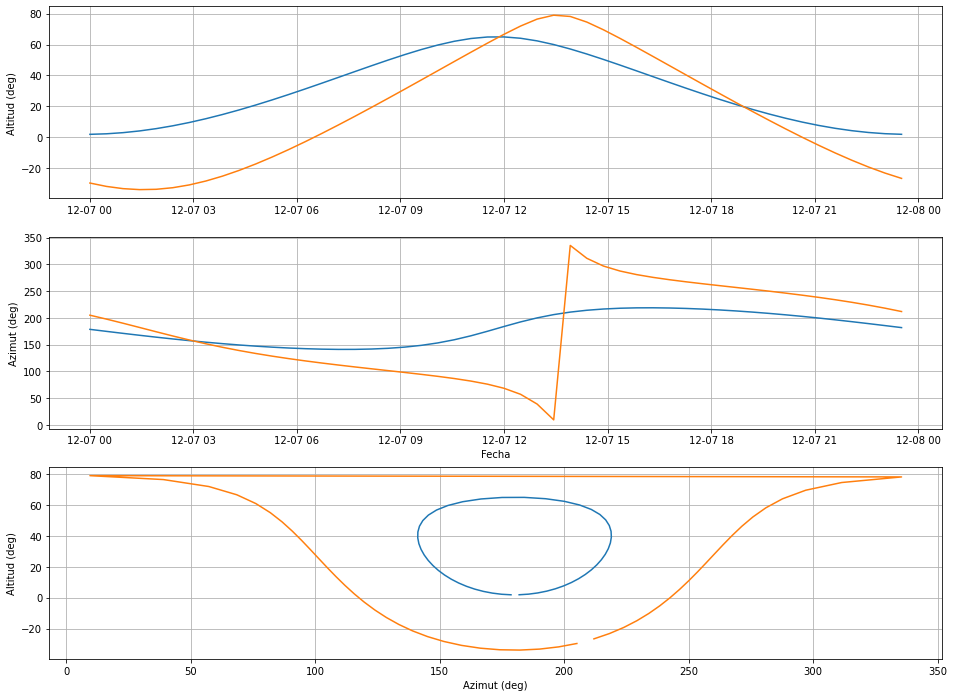

In [ ]:
## Hace gráficos de altitud y azimuth de punto de interés y el Sol, como función del tiempo
## El sol se muestra en color naranjo. El punto (l,b) en azul.

time_support()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(16,12))
ax1.plot(tstgo.time.datetime,aa)
ax1.plot(tstgo.time.datetime,solaa)
ax1.set_ylabel('Altitud (deg)')
ax1.grid(True)

ax2.plot(tstgo.time.datetime,zz)
ax2.plot(tstgo.time.datetime,solzz)
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Azimut (deg)')
ax2.grid(True)

## Gráfico de Altitud como función del Azimut, durante 24 h
ax3.plot(zz, aa)
ax3.plot(solzz, solaa)
ax3.set_xlabel('Azimut (deg)')
ax3.set_ylabel('Altitud (deg)')
ax3.grid(True)